# 1. Dane i ich modele przetwarzania
## 1.1 Dane w pythonie

In [1]:
klient = [38, 'Kawaler',1, 56.3]

In [2]:
type(klient)

list

In [3]:
a = [1,2,3]
b = [4,5,6]
print(f"a+b: {a+b}")

a+b: [1, 2, 3, 4, 5, 6]


In [4]:
try:
    print(a*b)
except TypeError:
    print("operacja niezdefiniowana")

operacja niezdefiniowana


In [5]:
import numpy as np
aa = np.array([1,2,3])
bb = np.array([4,5,6])

type(aa)

numpy.ndarray

In [6]:
print(f"aa+bb: {aa+bb}")

aa+bb: [5 7 9]


In [7]:
try:
    print(aa*bb)
except TypeError:
    print("operacja niezdefiniowana")

[ 4 10 18]


In [8]:
x = np.array(range(4))
x

array([0, 1, 2, 3])

In [9]:
x.shape

(4,)

In [10]:
A = np.array([range(4),range(4)])
A

array([[0, 1, 2, 3],
       [0, 1, 2, 3]])

In [11]:
A.shape

(2, 4)

In [12]:
A.T

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3]])

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()

In [14]:
type(iris)

sklearn.utils.Bunch

In [15]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [16]:
import numpy as np
import pandas as pd
pd.set_option('display.precision',2)

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])
                  
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [17]:
# nowa kolumna
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [18]:
# usuniecie kolumny
df = df.drop(columns=['target'])

In [19]:
# pierwsze wiersze
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
# ostatnie wiersze
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [21]:
# podstawowe informacje
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [22]:
# podstawowe statystyki 
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [23]:
# filtrowanie danych
X = df.iloc[:100,[0,2]].values 
# pierwsze sto wierszy + kolumna 0 i 2, 

In [24]:

# values- zamienia DataFrame na np.array
y = df.iloc[:100,4].values

In [25]:
# unikalne wartosci
y.unique()

['setosa', 'versicolor']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [26]:
# przetwarzanie warunkowe
y = np.where(y == 'setosa',-1,1)
X_iris, y_iris = X, y 

In [27]:
import matplotlib.pyplot as plt

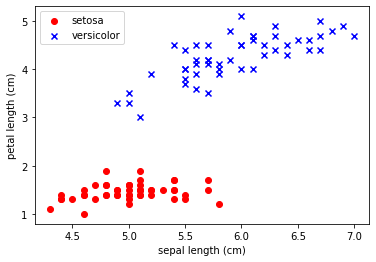

In [28]:
plt.scatter(X[:50,0],X[:50,1],color='red', marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue', marker='x',
label='versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
# plt.savefig('rys2.eps', format='eps')
plt.show()

In [29]:
import numpy as np
from keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

X_train.shape

(60000, 28, 28)

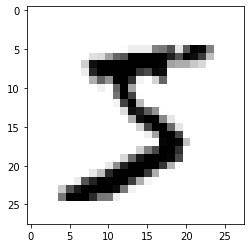

In [30]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [31]:
from fastai.vision.all import *

In [32]:
path = untar_data(URLs.MNIST_SAMPLE)
# wybierz trojke
thress = (path/'train'/'3').ls().sorted()
im3_path = thress[1]
im3 = Image.open(im3_path)
# zapisz obraz jako tensor i wytnij czesc
im3_t = tensor(im3)[4:15,4:22]

In [33]:
im3_df = pd.DataFrame(im3_t)
im3_df.style.set_properties(**{'font-size':'6pt'})\
.background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [34]:
import numpy as np
from keras.datasets import cifar10

(X_train, y_train),(X_test, y_test) = cifar10.load_data()
# rozmiar 
X_train.shape

(50000, 32, 32, 3)

In [35]:
import numpy as np
skalar = np.array(5)
print(skalar.ndim)

0


In [36]:
wektor_1d = np.array([3, 5, 7])
print(wektor_1d.ndim)

1


In [37]:
macierz_2d = np.array([[1,2],[3,4]])
print(macierz_2d.ndim)

2


In [38]:
import torch 
a = torch.tensor([1,2,3])
b = torch.tensor([3,4,5])
c = a+b
print(c)

tensor([4, 6, 8])


In [39]:
d = torch.tensor([[1,2,3],[3,4,5]])
d.size()


torch.Size([2, 3])

In [40]:
d.T

tensor([[1, 3],
        [2, 4],
        [3, 5]])

In [41]:
device = "cuda" if torch.cuda.is_available() else "cpu"

x = torch.tensor([[1,2,3],[4,5,6]], device=device)
x.device

device(type='cpu')

## Podłączenie do Apache Spark

Sprawdź rozdział 3

In [ ]:
import findspark
findspark.init('/Users/air/Desktop/spark')

In [ ]:
from pyspark import SparkContext

sc = SparkContext(master='local[*]', appName="book app")

In [ ]:
sc

In [ ]:
rdd = sc.parallelize(range(10))

In [ ]:
rdd

In [ ]:
# pierwszy element
rdd.first()

In [ ]:
# pierwsze dwa elementy
rdd.take(2)

In [ ]:
# losowe elementy v1
rdd.takeSample(True,3)

In [ ]:
# losowe elementy v2
rdd.takeSample(False,3)

In [ ]:
rdd.count()

In [ ]:
rdd.mean()

In [ ]:
rdd.reduce(lambda x,y: x+y)

In [ ]:
rdd.sum()

In [ ]:
rdd2 = rdd.map(lambda x: x*x)
rdd2.collect()

In [ ]:
rdd3 = rdd.map(lambda x: [x,x])
rdd3.collect()

In [ ]:
rdd4 = rdd.flatMap(lambda x: [x,x])
rdd4.collect()

In [ ]:
sc.parallelize(range(20)) \
.map(lambda x: x * 2) \
.filter(lambda x: x != 2) \
.reduce(lambda x,y: x + y)

In [ ]:
%%file example.txt
first 
second line 
the third line 
then a fourth line

In [ ]:
text_rdd = sc.textFile('example.txt')

In [ ]:
text_rdd.first()


In [ ]:

text_rdd.take(3)

In [ ]:
text_rdd.takeSample(True,2)

In [ ]:
text_rdd.count()

In [ ]:
text_rdd.map(lambda line: line.split()).collect()

In [ ]:
def nasza_fun(line):
    return line.split()

In [ ]:
text_rdd.map(nasza_fun).collect()

In [ ]:
import re
sc.textFile("example.txt") \
.map(lambda x: re.findall(r"[a-z']+", x.lower())) \
.flatMap(lambda x: [(y, 1) for y in x]) \
.reduceByKey(lambda x,y: x + y) \
.collect()

In [ ]:
import requests
requests.get('https://sebastianzajac.pl')

In [ ]:
import requests
import json

def pobierz_info_slowa(slowo):
  language = 'en-gb'
  headers = {"app_id":"c7f6d128",
             "app_key":"73ea2ed8109721300050137e74044fa6"}
  url_1 = "https://od-api.oxforddictionaries.com:443/api/v2/entries/"
  url = f"{url_1}{language}/{slowo.lower()}"
  return requests.get(url, headers=headers)

In [ ]:
odp = pobierz_info_slowa('streaming')
print(odp.text)

In [ ]:
odp.headers

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('newApp').getOrCreate()


In [ ]:
json_rdd = sc.parallelize([odp.text])
df_sp = spark.read.json(json_rdd)
df_sp.show(truncate=False)

In [ ]:
words = ["cogent", "digress", "tangible",
"diligent", "mellifluous", "obscure", "intelligible"]
lista_odp = [pobierz_info_slowa(word).text for word in words]
json_rdd = sc.parallelize(lista_odp)
json_df = spark.read.json(json_rdd)
json_df.show()

In [ ]:
json_df.printSchema()

In [ ]:
json_df.select('metadata.*').printSchema()

In [ ]:
json1 = """
{
"num": [1,2,3,4]
}
"""

In [ ]:
df1 = spark.read.json(sc.parallelize([json1]))
df1.printSchema()

In [ ]:
from pyspark.sql.functions import *

df1.select(explode('num').alias('number')).show()

In [ ]:
json_df.createOrReplaceTempView('slownik')

In [ ]:
flat_df = spark.sql("""select id as word, 
a.language
from slownik
lateral view outer explode(results)tmp1 as a
""")
flat_df.show()

In [ ]:
flat_df2 = spark.sql("""select id as word, 
a.language, b
from slownik
lateral view outer explode(results)tmp1 as a
lateral view outer explode(a.lexicalEntries)tmp2 as b
""")

In [ ]:
flat_df3 = spark.sql("""select id as word, 
a.language, definitions as definition,
examples.text as example
from slownik
lateral view outer explode(results)tmp1 as a
lateral view outer explode(a.lexicalEntries)tmp2 as b
lateral view outer explode(b.entries)tmp3 as c
lateral view outer explode(c.senses)tmp4 as d
lateral view outer explode(d.definitions)tmp5 as definitions
lateral view outer explode(d.examples)tmp6 as examples
""")

## 1.2. Żródła i przechowywanie danych

In [ ]:
df.head()

In [ ]:
from sqlalchemy import create_engine

In [ ]:
engine = create_engine('sqlite:///irysy.db')
# zapis ramki do bazy SQL
df.to_sql('dane', con=engine, index=False)

In [ ]:
a = engine.execute("SELECT * FROM dane").fetchall()
df2 = pd.DataFrame(a, columns=df.columns)
df2.head()

In [ ]:
import json
person = '{"name": "Alice", "languages": ["English", "French"]}'
person_dict = json.loads(person)

print( person_dict)

In [ ]:
print(person_dict['languages'])

In [ ]:
%%file test.json
{"name": "Alice", "languages": ["English", "French"]}

In [ ]:
with open('test.json') as f:
    data = json.load(f)

print(data)

In [ ]:
with open('person.json', 'w') as json_file:
    json.dump(person_dict, json_file)

In [ ]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

X, y = datasets.make_classification(n_samples=10**5,
n_features=20, n_informative=2, n_redundant=2)
                                    
train_samples = 100 

X_train = X[:train_samples]
X_test = X[train_samples:]
y_train = y[:train_samples]
y_test = y[train_samples:]

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

In [ ]:
import pickle

In [ ]:
with open('model.pkl', "wb") as picklefile:
    pickle.dump(rfc, picklefile)

In [ ]:
with open('model.pkl',"rb") as picklefile:
    model = pickle.load(picklefile)

In [ ]:
from joblib import dump, load

In [ ]:
with open('model.joblib', "wb") as jobf:
    dump(rfc, jobf)

In [ ]:
with open('model.joblib',"rb") as jobf:
    model = load(jobf)

## 1.3. Dane i Metadane

In [ ]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import json

In [ ]:
dane = {'temp':[15.2, 10, 13, 10, 12, 10],
        'deszcz':[2.5, 0.2, 0.6, 0.3, 1.8, 0.2]}
df = pd.DataFrame(dane)
df.index = pd.DatetimeIndex(['2021-10-01', '2021-10-02',
    '2021-10-03', '2021-10-04', '2021-10-05', '2021-10-06'], name="data")

In [ ]:
meta_dane = {'czas_zapisu': '2021-10-10T10:10:59',
'user':'Sebastian Zajac', 'wsp':'52.143 N, 21.1554 E'}

In [ ]:
meta_dane_key = 'pogoda.iot'

In [ ]:
tabela_A = pa.Table.from_pandas(df)
print(tabela_A.schema.metadata)

In [ ]:
meta_json = json.dumps(meta_dane)

In [ ]:
istniejace_metadane = tabela_A.schema.metadata
all_metadane = {meta_dane_key.encode() : meta_json.encode(),
**istniejace_metadane}

In [ ]:
tabela_A_md = tabela_A.replace_schema_metadata(all_metadane)
pq.write_table(tabela_A_md, 'przyklad.parquet',
compression='GZIP')

In [ ]:
tabela = pq.read_table('przyklad.parquet')
df2 = tabela.to_pandas()

In [ ]:
moje_meta_dane = tabela.schema.metadata[meta_dane_key.encode()]
m_m_d = json.loads(moje_meta_dane)

## 1.5. Obiektowośc Pythona a dane

### 1.5.1. Klasa 0 - Pusta klasa

In [ ]:
def moja_funkcja():
    pass

In [ ]:
class Nazwa(object):
    pass

In [ ]:
a = Nazwa()
b = Nazwa()

In [ ]:
[Nazwa() for x in range(5)]

In [ ]:
b.__dir__()

In [ ]:
'napis'.__dir__()

### 1.5.2. Klasa 1 - rzut kością

In [ ]:
from random import randint

class Kosc(object):
    """
    Klasa realizująca pojedynczy rzut kością
    
    Atributes
    ---------
    sciany : int, optional
        liczba ścian losowej kości (default is 6)
    
    Methods
    -------
    roll() :
        zwraca losową wartość od 1 do liczby ścian 
    """
    def __init__(self, sciany: int=6):
        """
        Parameters
        ----------
        sciany : int
            liczba ścian kości
        """

        self.sciany = sciany

    def roll(self):
        '''
        Zwraca losową liczbę naturalną od 1 do liczby ścian
        Return
        ------
        losowa wartość ściany kości
        '''
        return randint(1,self.sciany)

In [ ]:
kosc = Kosc() # stwórz kość

In [ ]:
results = []
for _ in range(10): # powtórz 10 razy
    result = kosc.roll() # rzuć kością raz
    results.append(result) # zapisz do listy

print(results)

### 1.5.3. Klasa 2 - błądzenie losowe

In [ ]:
from random import choice

class RandomWalk(object):
    """
    Klasa generująca błądzenie losowego w 2D

    Atributes
    ---------
    num_points : int
        liczba ścian losowej kości
    
    Methods
    -------
    fill_walk()) :
        zwraca realizację błądzenia losowego na płaszczyźnie
    """
    
    def __init__(self, num_points: int=5000):
        """
        Parameters
        ----------
        num_points : int, optional
            liczba kroków
        x_values : list 
            lista losowych połozen x
            początkowo punkt 0
        y_values : list
            lista losowych połozen y
            początkowo punkt 0
        """
        self.num_points = num_points
        self.x_values = [0]
        self.y_values = [0]

    def fill_walk(self):
        '''
        Zwraca wygenerowany przypadek bładzenia losowego
        Return
        ------
        listy x_values i y_values
        '''
        while len(self.x_values) < self.num_points:
            x_direction = choice([-1,1])
            x_distance = choice([0,1,2,3,4])
            x_step = x_direction*x_distance

            y_direction = choice([-1,1])
            y_distance = choice([0,1,2,3,4])
            y_step = y_direction*y_distance

            if x_step == 0 and y_step == 0:
                continue

            next_x = self.x_values[-1] + x_step
            next_y = self.y_values[-1] + y_step

            self.x_values.append(next_x)
            self.y_values.append(next_y)

In [ ]:
rw = RandomWalk(50000)
rw.fill_walk()

In [ ]:
point_number = list(range(rw.num_points))
plt.scatter(rw.x_values, rw.y_values, c=point_number, cmap=plt.cm.Blues, edgecolor='none', s=15)
plt.scatter(0, 0, c='green', edgecolor='none', s=100)
plt.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolor='none', s=100)
plt.axis('off')
plt.show()

### 1.5.4. Obiekty i bazy danych

In [ ]:
from sqlalchemy import create_engine
from sqlalchemy import Column, String, Integer
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker

In [ ]:
engine = create_engine('sqlite:///irysy.db')
base = declarative_base()

In [ ]:
class Transakcje(base):
    """Tabela danych"""
    __tablename__ = 'transakcje'
    transakcja_id = Column(Integer, primary_key=True )
    data = Column(String)
    przedmiot_id = Column(Integer)
    cena = Column(Integer)

    def __init__(self, transakcja_id, data, przedmiot_id, cena):
        self.transakcja_id = transakcja_id
        self.data = data
        self.przedmiot_id = przedmiot_id
        self.cena = cena

In [ ]:
base.metadata.create_all(engine)

from sqlalchemy.orm import sessionmaker
# Stworzenie nowej sesji
Session = sessionmaker(bind=engine)
session = Session()

In [ ]:
for t in range(10):
    tr = Transakcje(t, f'200{t}/05/06', t**2-t*2, 19)
    session.add(tr)
# zapis zmian w bazie danych
session.commit()

In [ ]:
for s in session.query(Transakcje).all():
    print(s.transakcja_id, s.data, s.cena)

In [ ]:
# wybrane transakcje
for s in session.query(Transakcje).filter(Transakcje.transakcja_id>5):
    print(s.transakcja_id, s.data)

### 1.5.5. Obiektowoś w pakiecie Scikit-Learn

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# przykładowe dane
dane = {"zm1":[4.35, 23.3, 5.34, 45.2, 5, 34.5, 23.5, 62.3, 62.7, 35.8],
        "zm2":[2.3, 5.2, np.nan, 6.2, 3.4, np.nan, 3.5, 1.3, 7.4, 5.66 ], 
        "zm3":["czerwony","zielony","czerwony","niebieski","zielony",
               "zielony", "niebieski", "niebieski","czerwony","zielony"], 
        "zm4":["M","F","M","M","F","M","M","F","F","F"]
        }
df = pd.DataFrame(dane)

In [ ]:
numeric_features = ["zm1", "zm2"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
categorical_features = ["zm3", "zm4"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(transformers=[
    ("num_trans", numeric_transformer, numeric_features),
    ("cat_trans", categorical_transformer, categorical_features)
])

In [ ]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ("preproc", preprocessor),
    ("model", LogisticRegression())
])

In [ ]:
from sklearn import set_config
set_config(display='diagram')

pipeline

In [ ]:
X = df
y = [0,1,1,0,1,0,0,0,1,1]

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_test, y_tr, y_test = train_test_split(X,y, 
test_size=0.2, random_state=42)
pipeline.fit(X_tr, y_tr)
# jakość modelu
score = pipeline.score(X_test, y_test)
print(score)

In [ ]:
import joblib
joblib.dump(pipeline, 'your_pipeline.pkl')

In [ ]:
param_grid = [
              {"preproc__num_trans__imputer__strategy":
              ["mean","median"],
               "model__n_estimators":[2,5,10,100,500],
               "model__min_samples_leaf": [1, 0.1],
               "model":[RandomForestClassifier()]},
              {"preproc__num_trans__imputer__strategy":
              ["mean","median"],
               "model__C":[0.1,1.0,10.0,100.0,1000],
               "model":[LogisticRegression()]}
]

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, 
cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_tr, y_tr)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_.score(X_test,y_test)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class DelOneValueFeature(BaseEstimator, TransformerMixin):
    """Transformacja usuwająca zmienne, które posiadają
    tylko jedną wartość w całej kolumnie. Takie kolumny
    nie nadają się do modelowania. Metoda fit() wyszuka
    wszystkie takie kolumny. Natomiast metoda transform()
    usunie je ze zbioru danych.
    """
    def __init__(self):
        self.one_value_features = []
        
    def fit(self, X, y=None):
        for feature in X.columns:
            unikalne = X[feature].unique()
            if len(unikalne)==1:
                self.one_value_features.append(feature)
        return self
    
    def transform(self, X, y=None):
        if not self.one_value_features:
            return X
        return X.drop(axis='columns',
        columns=self.one_value_features)

In [ ]:
pipeline2 = Pipeline([
    ("moja_transformacja",DelOneValueFeature()),
    ("preprocesser", preprocessor), 
    ("classifier", LogisticRegression())])

In [ ]:
pipeline2.fit(X_tr, y_tr)
score2 = pipeline2.score(X_test, y_test)

In [ ]:
score2

### 1.5.6. Obiektowa siec neuronowa

In [55]:
X = 3 * np.random.rand(100,1)
y = 5 + 2 * X + np.random.randn(100,1)

In [61]:
# dodajemy 1 do każdej obserwacji 
X_b = np.c_[np.ones((100,1)),X]
# rozwiazanie
parametry = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
parametry
# dla wylosowanych przeze mnie danych

array([[5.30449679],
       [1.85978851]])

In [75]:
df2 = pd.DataFrame(X,columns=['X']) 

In [77]:
df2['y'] = y

In [78]:
df2

,X,y
0,2.65,9.62
1,1.16,7.16
2,1.88,10.73
3,0.68,5.00
4,0.21,5.82
...,...,...
95,2.80,9.63
96,0.15,5.90
97,2.64,10.90
98,1.19,7.81


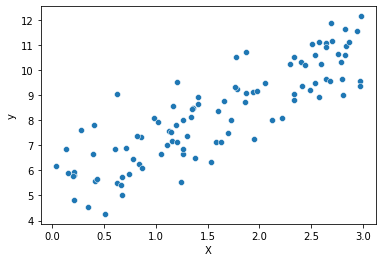

In [84]:
import seaborn as sb 
import pandas as pd

sb.scatterplot(data = df2, x='X',y='y')
plt.savefig('punkty1.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


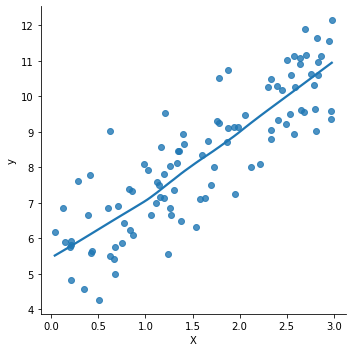

In [89]:
sb.lmplot(data=df2, x='X',y='y', lowess=True)
plt.savefig('punkty2.eps')

In [44]:
eta = 0.1
l_iteracji = 1000
m = 100
# losowe wartosci poczatkowe
theta = np.random.randn(2,1)

In [ ]:
for epoka in range(l_iteracji):
    grad = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * grad

theta

In [ ]:
import numpy as np 
from keras import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(units=1, input_shape=[1])
])
model.compile(optimizer='sgd', loss="mean_squared_error")
model.fit(X, y, epochs=500)


In [ ]:
model.get_weights()

In [ ]:
X, y = X_iris, y_iris
dziecko = Perceptron()
dziecko.fit(X,y)

In [ ]:
class Perceptron(object):
    """Klasa realizująca algorytm sieci neuronowej"""
    
    def fit(self, X, y):
        pass

In [ ]:
dziecko = Perceptron()
dziecko.fit(X,y)

In [ ]:
class Perceptron(object):
    """Klasa realizująca algorytm sieci neuronowej"""
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        pass

In [ ]:
dziecko = Perceptron()
dziecko.fit(X,y)
dziecko.n_iter, dziecko.eta

In [ ]:
class Perceptron(object):
    """Klasa realizująca algorytm sieci neuronowej"""
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y ):
        self.w_ = np.zeros(1+X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
               update = self.eta*(target-self.predict(xi))
               self.w_[1:] += update*xi
               self.w_[0] += update
               errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X)>=0.0,1,-1)

In [ ]:
dziecko_uczy_sie_irysow = Perceptron()
dziecko_uczy_sie_irysow.fit(X,y)

In [ ]:
print(dziecko_uczy_sie_irysow.w_)

In [ ]:
print(dziecko_uczy_sie_irysow.errors_)

In [ ]:
import numpy as np
X_and = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and = np.array([-1,-1,-1,1])

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier, resolution=0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0], y=X[y==cl,1],
        alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

In [ ]:
plot_decision_regions(X,y,
classifier=dziecko_uczy_sie_irysow)
plt.xlabel("dlugosc dzialki [cm]")
plt.ylabel("dlugosc platka [cm]")
plt.legend(loc='upper left')
plt.show()

In [ ]:
class Adaline():
    '''Klasyfikator  - ADAptacyjny LIniowy NEuron'''
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X,y):
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(X)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [ ]:
ad = Adaline(n_iter=20, eta=0.01)
ad.fit(X,y)
# otrzymane wagi
ad.w_
# array([-0.0259, -0.06051, 0.17152])
# wykres granicy decyzyjnej
plot_decision_regions(X,y,classifier=ad)
plt.xlabel("dlugosc dzialki [cm]")
plt.ylabel("dlugosc platka [cm]")
plt.legend(loc='upper left')
plt.show()

In [ ]:
ad2 = Adaline(n_iter=20, eta=0.0001)
ad2.fit(X,y)

In [ ]:
ad2.w_

In [ ]:
plot_decision_regions(X,y,classifier=ad2)
plt.xlabel("dlugosc dzialki [cm]")
plt.ylabel("dlugosc platka [cm]")
plt.legend(loc='upper left')
plt.show()